# TP Programmez votre première régression linéaire 

## 1. Intro et Preprocess

In [1]:
data_path = "~/Documents/openclassroom/Fomation_ingenieur_ML/data/"

In [2]:
# On importe les librairies dont on aura besoin pour ce tp
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [15, 5]

In [3]:
### EXTRACTION DATA ###
# On charge le dataset
house_data = pd.read_csv(data_path+'house.csv')

house_data.head()

,loyer,surface
0,1330,37
1,1400,32
2,904,26
3,955,30
4,2545,70


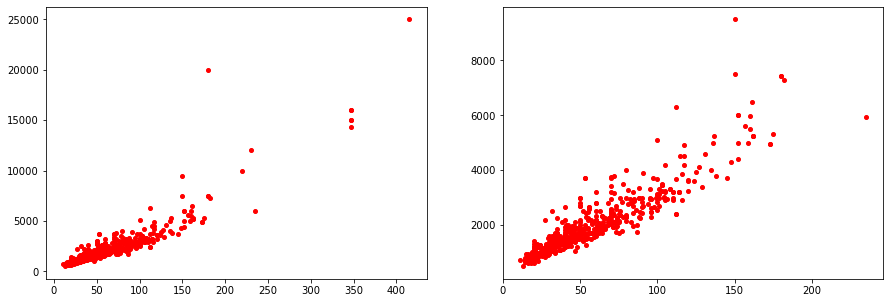

In [4]:

# On affiche le nuage de points dont on dispose
plt.subplot(1, 2, 1)
plt.plot(house_data['surface'], house_data['loyer'], 'ro', markersize=4)

# On enleve les outliers pour cet exemple (=loyer de plus de 10000€)
house_data = house_data[house_data['loyer'] < 10000]
plt.subplot(1, 2, 2)
plt.plot(house_data['surface'], house_data['loyer'], 'ro', markersize=4)


## Régression linéaire - résolution algèbrique

On sait que la solution de la régression $y = X \times \theta$ a pour solution $ \theta = (X^T X)^{-1} X^T y$

In [5]:
### REGRESSION LINEAIRE ###
# On décompose le dataset et on le transforme en matrices pour pouvoir effectuer notre calcul
X = np.matrix([np.ones(house_data.shape[0]), house_data['surface'].values]).T
y = np.matrix(house_data['loyer']).T

# On effectue le calcul exact du paramètre theta
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

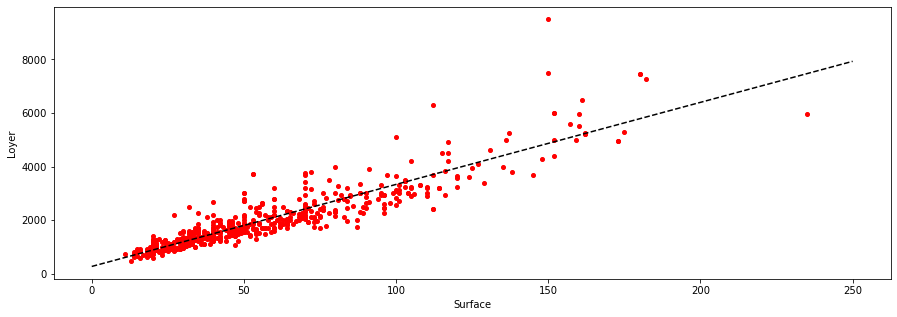

In [6]:
# On vérifie graphiquement :
plt.xlabel('Surface')
plt.ylabel('Loyer')
plt.plot(house_data['surface'], house_data['loyer'], 'ro', markersize=4)
# On affiche la droite entre 0 et 250
plt.plot([0,250], [theta.item(0),theta.item(0) + 250 * theta.item(1)], linestyle='--', c='#000000')
plt.show()

### Prédiction : 
Pour une surface de 40 m², le loyer prédit est :

In [7]:
theta.item(0) + theta.item(1) * 40

1492.902441366677

## 2. Régression linéaire - sklearn

In [8]:
### REGRESSION LINEAIRE AVEC SKIKIT-LEARN ###
from sklearn import linear_model
regr = linear_model.LinearRegression()


Ce qui est proposé dans le cours : 

<code> 
    regr.fit(X, y)
    regr.predict(<des données de test>)
</code>

problème : décomposer en train-test. 


### 2.1. Décomposition train-test "à la main" 

Je commence par le faire à la main :

In [9]:
data_size = len(house_data['loyer'])

n_train = np.sort(np.random.choice(range(data_size), size=int(data_size*0.9), replace=False))
house_data_train = house_data.iloc[n_train]
X_train = np.matrix([np.ones(house_data_train.shape[0]), house_data_train['surface'].values]).T
y_train = np.matrix(house_data_train['loyer']).T

n_test = [(k not in n_train) for k in range(data_size)]
house_data_test = house_data.iloc[n_test]
X_test = np.matrix([np.ones(house_data_test.shape[0]), house_data_test['surface'].values]).T
y_test = np.matrix(house_data_test['loyer']).T


In [10]:
regr.fit(X_train, y_train)
tmp = np.concatenate((y_test.T, regr.predict(X_test).T)).T
print( pd.DataFrame(tmp,columns=["value","pred"]).head() )

    value         pred
0   980.0  1062.048211
1  1500.0  1339.697469
2  1340.0  1555.646892
3  1445.0  1679.046562
4  1550.0  1555.646892


### 2.2 Décomposition train-test avec sklearn 

In [16]:
from sklearn.model_selection import train_test_split
X = np.matrix([np.ones(house_data.shape[0]), house_data['surface'].values]).T
y = np.matrix(house_data['loyer']).T
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [17]:
regr.fit(X_train, y_train)
tmp = np.concatenate((y_test.T, regr.predict(X_test).T)).T
print( pd.DataFrame(tmp,columns=["value","pred"]).head() )

    value         pred
0  1350.0  1247.079766
1  2750.0  2737.854408
2  2587.0  2494.462630
3  1700.0  1307.927711
4  1120.0   912.416071
